# **Final Group Project Report**
## Title: Predicting Existence of Heart Disease
Group 8

Team members: Mireia Fortuno Ledesma, Steve He, Karry Jiang, Ashine Zhang

## **Introduction**
Heart disease is a subset of cardiovascular diseases, the global leading cause of death. From the Framingham Heart Study, many different factors, such as age, are found to be correlated with heart disease. 

The question we will answer with this project is: Can we predict predict whether someone will be diagnosed with heart disease (Healthy or Diagnosed) based on `age`, `thalach`, and `chol`? 

The dataset used is "Heart Disease" Data Set, consisting of 14 attributes: 
* `age` (in years)
* `sex` (1 = male; 0 = female)
* `cp`: Chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* `trestbps`: resting blood pressure (mmHg)
* `chol`: serum cholesterol (mg/dl)
* `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
* `restecg`: resulting electrocardiographic results
* `thalach`: maximum heart rate achieved 
* `exang`: exercise induced angina (1= yes; 0= no)
* `oldpeak`: ST depression induced by exercise relative to rest
*  `slope`: slope of peak exercise ST segment
    - Value 1: upsloping = 3
    - Value 2: flat = 2
    - Value 3: downsloping = 1
* `ca`: number of major vessels (0, 1, 2, 3)
* `thal`: 
    - Value 3 = normal
    - Value 6 = fixed defect
    - Value 7 = reversible defect
* `num`: diagnosis of heart disease
    - Value 0: Healthy, <50% diameter narrowing
    - Value 1: Diagnosed with stage 1, >50% diameter narrowing
    - Value 2: Diagnosed with stage 2, >50% diameter narrowing
    - Value 3: Diagnosed with stage 3, >50% diameter narrowing
    - Value 4: Diagnosed with stage 4, >50% diameter narrowing


## **Methods & Results**

### Reading and cleaning the data

In [61]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

## set a seed for reproducibility
set.seed(1111)

In this following cells we perform 5 steps:

* We read the data directly from the internet into this R notebook.
* Since the data doesn't have columns' names, we explicitly write the names from the information we find in https://archive.ics.uci.edu/ml/datasets/Heart+Disease.
* We remove rows which have null values by filtering. In this case null values are represented as "?", and we know that ca and thal have null values.
* We change the data type of some of the variables since in the webpage mentioned above we can see that some variables should be categorical, as they only have a few possible values.
* We create a new variable from num called target. Instead of having different values of diagnosed (num= 1, 2, 3 or 4) we just consider if the person has been diagnosed with a heart disease or not.

In [62]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data_original <- read_csv(url)
head(data_original, 10)

Warning message:
“Duplicated column names deduplicated: '1.0' => '1.0_1' [3], '1.0' => '1.0_2' [6], '0.0' => '0.0_1' [12]”
Parsed with column specification:
cols(
  `63.0` = col_double(),
  `1.0` = col_double(),
  `1.0_1` = col_double(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  `1.0_2` = col_double(),
  `2.0` = col_double(),
  `150.0` = col_double(),
  `0.0` = col_double(),
  `2.3` = col_double(),
  `3.0` = col_double(),
  `0.0_1` = col_character(),
  `6.0` = col_character(),
  `0` = col_double()
)



63.0,1.0,1.0_1,145.0,233.0,1.0_2,2.0,150.0,0.0,2.3,3.0,0.0_1,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [63]:
data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                                    "exang", "oldpeak", "slope", "ca", "thal", "num")) %>%
        filter(ca != "?" & thal != "?") %>%
        mutate(sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg),
               exang = as.factor(exang), slope = as.factor(slope), thal = as.factor(thal), num = as.factor(num),
               ca = as.factor(ca),
               target = ifelse(num==0, "Healthy", "Diagnosed"), target = as.factor(target))
        

head(data, 10)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Healthy
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Diagnosed
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Diagnosed
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Healthy
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Healthy
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,Healthy
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,Diagnosed
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,Healthy
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,Diagnosed


### Splitting data into Train and Test

For the next part, we want to explore our dataset, but only the training dataset. Therefore we first will split the data into 2 sub-datasets. We will use 75% of our data for training and the variable we want to classify is `target`.

In [64]:
data_split <- initial_split(data, prop = 0.75, strata = target)  
data_train <- training(data_split)   
data_test <- testing(data_split)

head(data_train, 5)
head(data_test, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Healthy
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Diagnosed
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Healthy
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,Diagnosed
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,Healthy


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Diagnosed
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Healthy
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,Healthy
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,Healthy
49,1,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0,Healthy


Now we can see the size we originally had from the whole dataset, as well as the size of the training dataset and the test dataset.

In [47]:
nrow(data)
nrow(data_train)
nrow(data_test)

[1] 297

[1] 223

[1] 74

### Training Data Summary Table
We perform an exploratory data analysis of the data and show it in a table format. The table reports the number of healthy and diagnosed cases, the means of the predictor variables we plan to use in the analysis and similar characteristics that patients in each case exhibit. 

In [48]:
str(data_train)

tibble [223 × 15] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:223] 63 67 41 62 57 63 53 57 56 44 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 2 4 4 4 4 4 3 2 ...
 $ trestbps: num [1:223] 145 160 130 140 120 130 140 140 130 120 ...
 $ chol    : num [1:223] 233 286 204 268 354 254 203 192 256 263 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 2 1 2 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 3 1 3 3 1 3 1 ...
 $ thalach : num [1:223] 150 108 172 160 163 147 155 148 142 173 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 2 1 2 1 ...
 $ oldpeak : num [1:223] 2.3 1.5 1.4 3.6 0.6 1.4 3.1 0.4 0.6 0 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 1 3 1 2 3 2 2 1 ...
 $ ca      : Factor w/ 4 levels "0.0","1.0","2.0",..: 1 4 1 3 1 2 1 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3.0","6.0","7.0": 2 1 1 1 1 3 3 2 2 3 ...
 $ num     : Factor w/ 5 levels "0","1","2","3",..: 1 3 1 4 1 

In [49]:
EDA_data <- data_train %>%
    group_by(target) %>%
    summarize(n = n(),
              mean_age = mean(age, na.rm = TRUE),
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              mean_thalach = mean(thalach, na.rm = TRUE),
              mean_oldpeak = mean(oldpeak, na.rm = TRUE),
              majority_sex = sex[n == max(n)][1],
              majority_cp = cp[n == max(n)][1],
              majority_fbs = fbs[n == max(n)][1],
              majority_restecg = restecg[n == max(n)][1],
              majority_exang = exang[n == max(n)][1],
              majority_slope = slope[n == max(n)][1],
              majority_ca = ca[n == max(n)][1],
              majority_thal = thal[n == max(n)][1])

EDA_data

`summarise()` ungrouping output (override with `.groups` argument)



target,n,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpeak,majority_sex,majority_cp,majority_fbs,majority_restecg,majority_exang,majority_slope,majority_ca,majority_thal
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Diagnosed,103,56.39806,134.5340,252.4757,139.7184,1.656311,1,4,0,2,1,2,3.0,3.0
Healthy,120,53.59167,129.7583,240.4833,155.8833,0.637500,1,1,1,2,0,3,0.0,6.0


### Training Data Visualization Analysis

Now we perform another exploratory data analysis to visualize the data with some relevant plots to our analysis. 

We will compares the distributions of each of the predictor variables we plan to use to our predictive variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



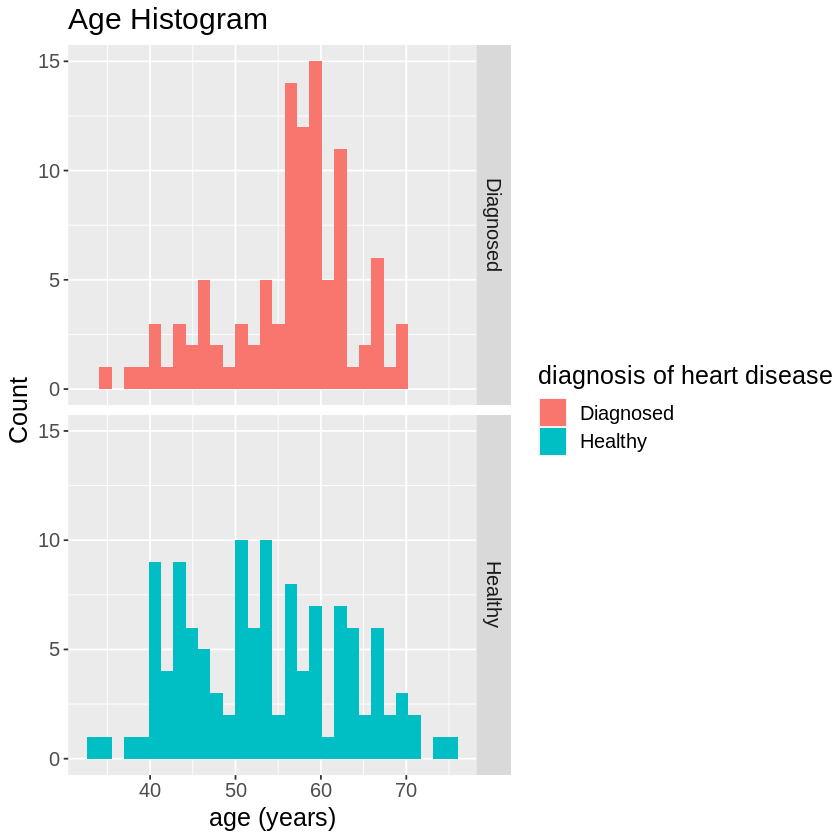

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



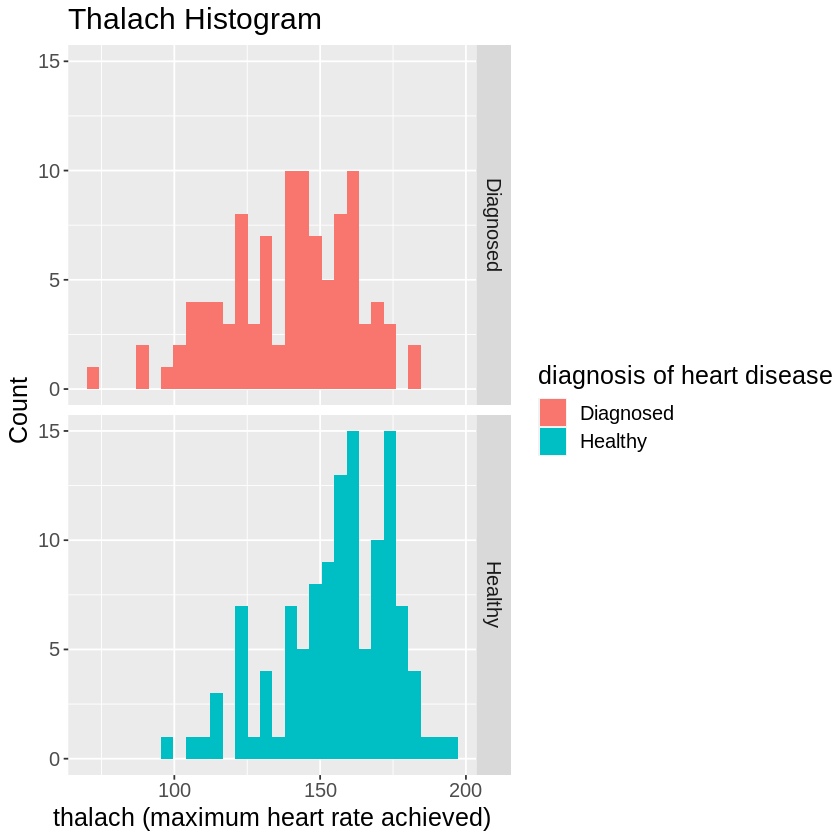

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



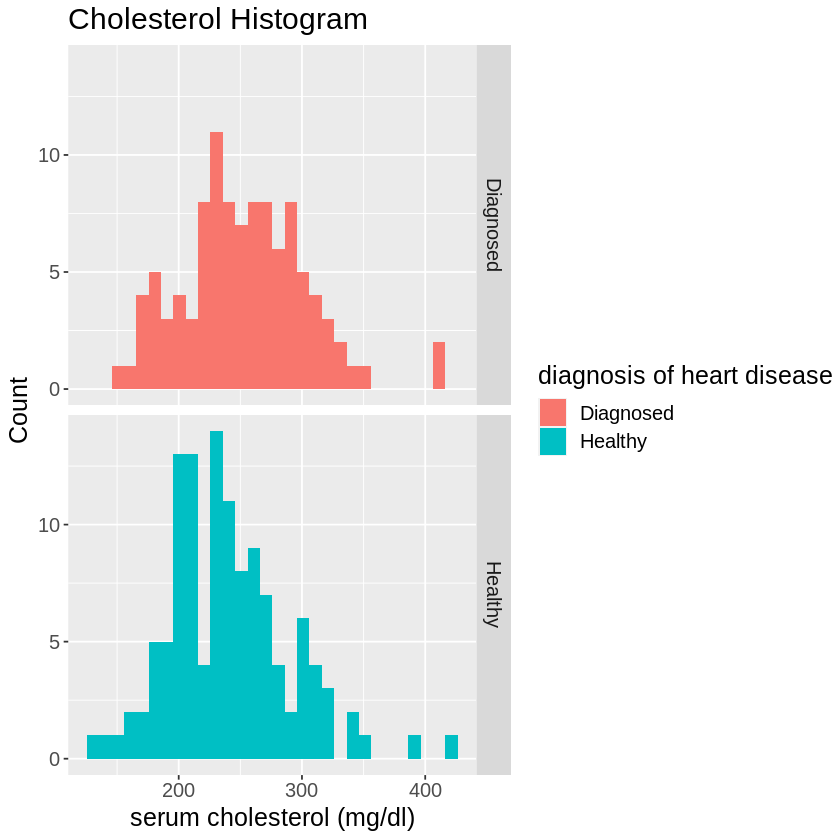

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



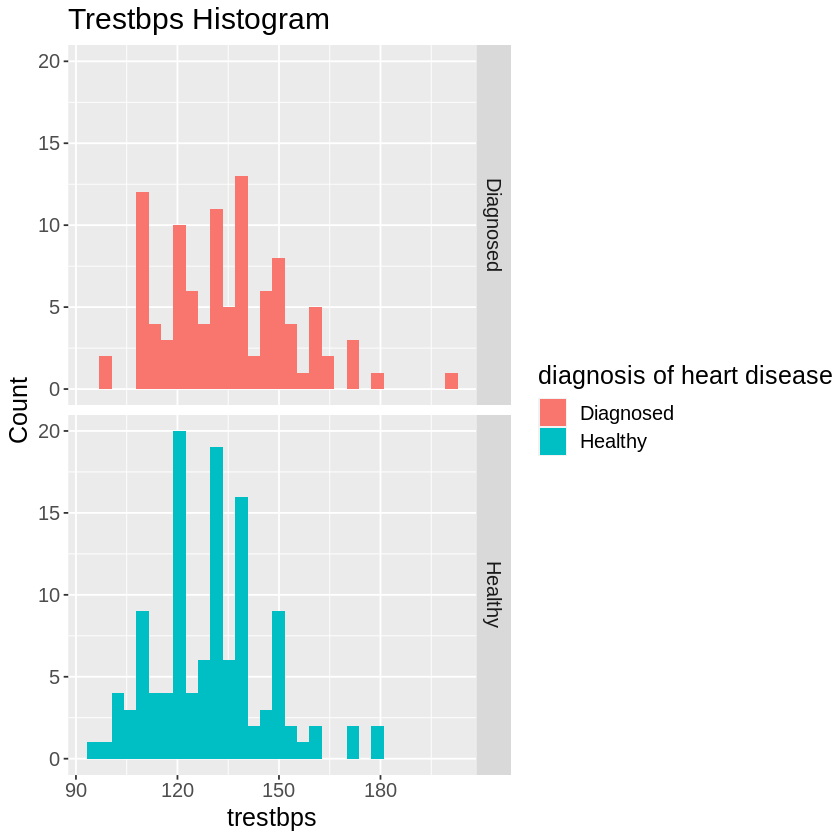

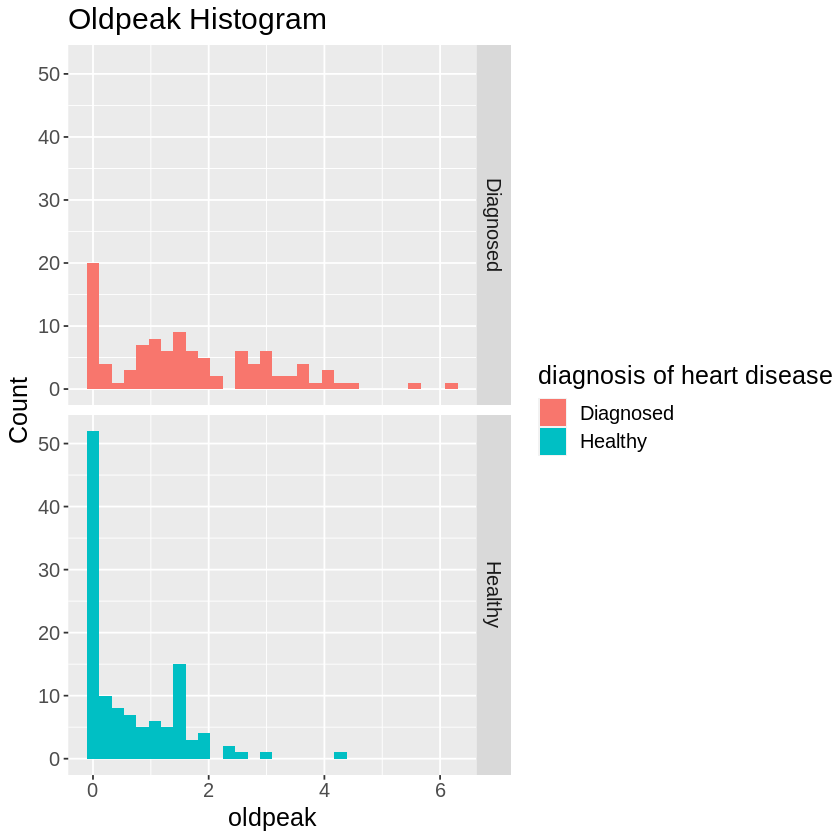

In [50]:
age_histogram = data_train %>%
        ggplot(aes(x = age, fill = target)) +
        geom_histogram() +
        labs(x = "age (years)", y = "Count", fill = "diagnosis of heart disease") + 
         ggtitle("Age Histogram") +
        theme(text = element_text(size = 15)) +
        facet_grid(rows = vars(target))
age_histogram


thalach_histogram = data_train %>%
        ggplot(aes(x = thalach, fill = target)) +
        geom_histogram() +
        labs(x = "thalach (maximum heart rate achieved)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Thalach Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
thalach_histogram

chol_histogram = data_train %>%
        ggplot(aes(x = chol, fill = target)) +
        geom_histogram() +
        labs(x = "serum cholesterol (mg/dl)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Cholesterol Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
chol_histogram

trestbps_histogram = data_train %>%
        ggplot(aes(x = trestbps, fill = target)) +
        geom_histogram() +
        labs(x = "trestbps", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Trestbps Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
trestbps_histogram

oldpeak_histogram = data_train %>%
        ggplot(aes(x = oldpeak, fill = target)) +
        geom_histogram() +
        labs(x = "oldpeak", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Oldpeak Histogram") +
        theme(text = element_text(size = 15)) + 
        facet_grid(rows = vars(target))
oldpeak_histogram

In [51]:
data_num <- data_train %>%
    select(age, chol, thalach, oldpeak)

res <- cor(data_num)
round(res, 2)

,age,chol,thalach,oldpeak
age,1.00,0.11,-0.35,0.20
chol,0.11,1.00,0.00,0.03
thalach,-0.35,0.00,1.00,-0.29
oldpeak,0.20,0.03,-0.29,1.00


### Data Analysis

Now we perform perform the actual Data Analysis. After analyzing the data visualization above, we dicide to use `age`, `olpeak`, and `thalach` as  the three predicting variables used to determine the best k value. We firstly perform a cross-validation in R using the `vfold_cv` function and perform 5-fold cross-validation. We then perform K-nearest neighbor model specification and insert `tune` for `neighbours` argument. After performing workflow analysis, `accuracy` is being filtered and we create a line plot  with `neighbors` on the x-axis and the `mean` on the y-axis. 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7128283,5,0.02106951,Model04


Number of neighbours selected:  6
Model accuracy:  0.6621622

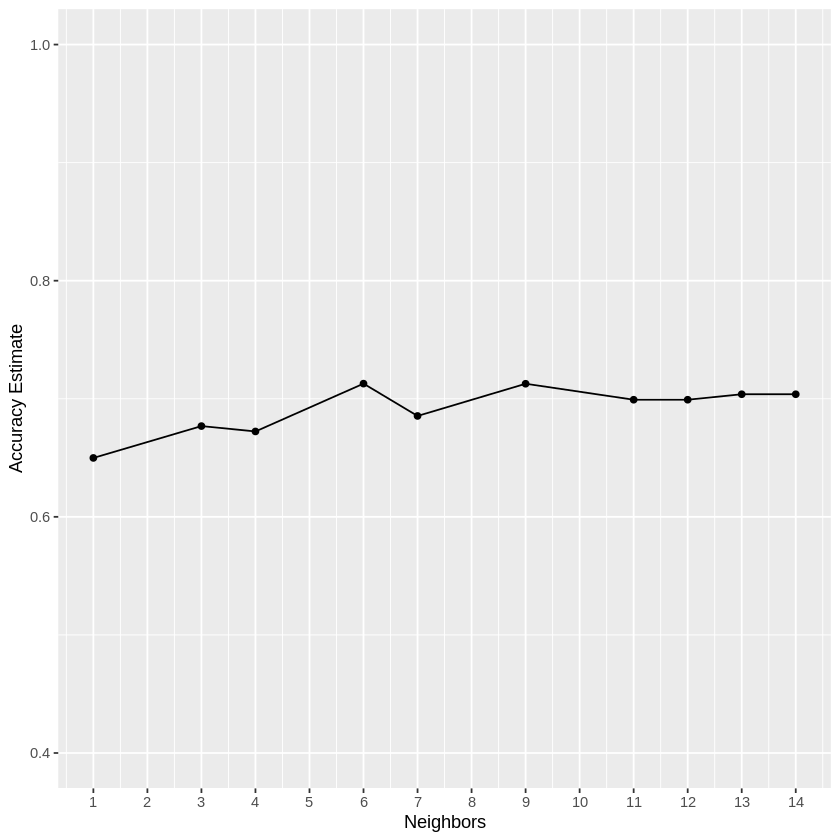

In [67]:
# Set the seed
set.seed(9999) 

# your code here
recipe <- recipe(target ~ age + oldpeak + thalach, data = data_train)
vfold <- vfold_cv(data_train, v = 5, strata = target)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification") 

knn_results <- workflow() %>%
       add_recipe(recipe) %>%
       add_model(knn_tune) %>%
       tune_grid(resamples = vfold, grid = 10) %>%
       collect_metrics()

accuracies <- knn_results %>% 
       filter(.metric == "accuracy")
max_accurcy<- accuracies %>% filter(mean == max(mean))
max_accurcy

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

cross_val_plot

k_min <- accuracies %>%
       arrange(desc(mean)) %>%
       slice(1) %>%
       pull(neighbors)

# build model with thebest k
model_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("classification")

model_best_fit <- workflow() %>%
          add_recipe(recipe) %>%
          add_model(model_best_spec) %>%
          fit(data = data_train)

knn_accuracy <- model_best_fit %>%
            predict(data_test) %>%                    
            bind_cols(data_test) %>%
            metrics(truth = target, estimate = .pred_class) %>%
            filter(.metric == "accuracy") %>%
            select(.estimate) %>%
            pull()
         
cat("Number of neighbours selected: ", k_min)
cat("\n")
cat("Model accuracy: ", knn_accuracy)

Based on the line plot above, we find that k=6 give us the best accuracy, which is around 71.3%. We perform K-nearest neighbor model specification using k=6 on `data_test` to figure out the accuracy of our model. 

In [70]:

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) %>%
       set_engine("kknn") %>%
       set_mode("classification") 

knn_results_best <- workflow() %>%
       add_recipe(recipe) %>%
       add_model(knn_best) %>%
       fit(data_train)

test_predictions<- predict(knn_results_best , data_test) %>%
       bind_cols(data_test) 

prediction_accuracy<- test_predictions %>%
         metrics(truth = target, estimate = .pred_class)

prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6621622
kap,binary,0.3091860


## **Discussion**

**(need to fill)**

* summarize what you found
* discuss whether this is what you expected to find?
* discuss what impact could such findings have?
* discuss what future questions could this lead to?

## **References**

**(need to fill)**

* At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
* Make sure to cite the source of your data as well.